In [1]:
import pandas as pd
import geopandas as geopd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [24]:
col_names = ['id', 'created_at', 'text', 'coordinates', 'place','user']
all_tweets = pd.read_csv("Data/tweets_all_columns.csv", header=None)
all_tweets.columns = col_names

In [25]:
all_tweets.head(5)

,id,created_at,text,coordinates,place,user
0,340454626463723520,Fri May 31 13:08:02 +0000 2013,If everything goes good..Might have two week p...,NaN,NaN,"{u'follow_request_sent': False, u'has_extended..."
1,340454628267261952,Fri May 31 13:08:03 +0000 2013,RT @aforgutu: Police use of force against #dir...,NaN,NaN,"{u'follow_request_sent': False, u'has_extended..."
2,340454627055124481,Fri May 31 13:08:03 +0000 2013,RT @FYEG: Call for Immediate Action / Solidari...,NaN,NaN,"{u'follow_request_sent': False, u'has_extended..."
3,340454625759080448,Fri May 31 13:08:02 +0000 2013,RT @AssyrianPrince: @AlMonitor Hello! I'm curi...,NaN,NaN,"{u'follow_request_sent': False, u'has_extended..."
4,340454623724847104,Fri May 31 13:08:02 +0000 2013,#occupygezi needs your global media support @C...,NaN,NaN,"{u'follow_request_sent': False, u'has_extended..."


In [26]:
len(all_tweets)

2210332

In [107]:
geo_tagged_tweets = all_tweets[all_tweets['coordinates'].isna() == False]

In [108]:
geo_tagged_tweets.head()

,id,created_at,text,coordinates,place,user
23,340454677818769408,Fri May 31 13:08:15 +0000 2013,I'm at sweet home (istanbul) http://t.co/WpsQe...,"{u'type': u'Point', u'coordinates': [29.047036...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended..."
354,340455577564110849,Fri May 31 13:11:49 +0000 2013,Policeuse of force against #direngezipark prot...,"{u'type': u'Point', u'coordinates': [29.175439...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended..."
501,340455932549017601,Fri May 31 13:13:14 +0000 2013,@oemoral: RT @kbertan: Bridge together #occupy...,"{u'type': u'Point', u'coordinates': [29.260890...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended..."
537,340456017714364419,Fri May 31 13:13:34 +0000 2013,It is planning to be closed tweeter. Be our vo...,"{u'type': u'Point', u'coordinates': [29.175988...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended..."
712,340456501447634944,Fri May 31 13:15:29 +0000 2013,Look what's happening in Istanbul Gezi Park. S...,"{u'type': u'Point', u'coordinates': [29.096900...","{u'country_code': u'TR', u'url': u'https://api...","{u'follow_request_sent': False, u'has_extended..."


In [109]:
import ast
def read_long(x):
    x = ast.literal_eval(x)
    return x['coordinates'][0]

In [110]:
def read_lat(x):
    x = ast.literal_eval(x)
    return x['coordinates'][1]

In [111]:
x = {u'type': u'Point', u'coordinates': [29.04703617, 41.00869405]}
x['coordinates'][1]

41.00869405

In [112]:

geo_tagged_tweets['long'] = geo_tagged_tweets['coordinates'].apply(lambda x: read_long(x))

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [113]:
geo_tagged_tweets['lat'] = geo_tagged_tweets['coordinates'].apply(lambda x: read_lat(x))

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
geo_tagged_tweets['lat']

23         41.008694
354        40.997181
501        40.876334
537        40.997061
712        40.988983
991        31.722692
1006       40.989318
1119       40.976423
1367       51.464431
1391       53.605362
1418       41.031545
1607       51.464466
1714       51.418593
1769       41.026888
1777       43.066110
1941       41.109203
1983       38.407022
2088       44.253735
2219       40.010233
2232       41.000104
2259       31.948547
2800       41.018010
2950       53.760651
3457       40.957604
3853       36.081705
3981       41.039258
4086       41.047958
4178       36.546768
4297       40.844321
4312       51.892555
             ...    
2209583    36.643016
2209590    41.034212
2209597   -43.602161
2209686    41.040051
2209703    41.899155
2209735    41.067818
2209752    41.019580
2209800    40.978259
2209879    40.974272
2209926    41.005913
2209951    47.645812
2209954    40.950306
2209959    49.279753
2209963    41.041141
2209973    40.904597
2209976    40.952482
2209984    32

In [115]:
geo_tagged_tweets.to_csv("Data/geo_tagged_tweets.csv")

In [165]:
len(geo_tagged_tweets)

28434

In [117]:
#create Point type for the inicdents in GEDELt incidents of interest
events_points = geo_tagged_tweets[["long","lat"]].apply(lambda x: Point(x['long'], x['lat']), axis = 1)

In [118]:
geo_tagged_tweets['points'] = events_points

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
geo_tagged_tweets_points = geopd.GeoDataFrame(geo_tagged_tweets, geometry='points')

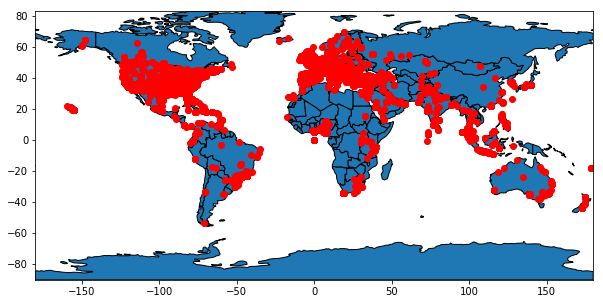

In [164]:
world = geopd.read_file(geopd.datasets.get_path('naturalearth_lowres'))
minx, miny, maxx, maxy = world.total_bounds
ax = world.plot(figsize=(10, 10),edgecolor='black')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
geo_tagged_tweets_points.plot(ax=ax, color='red')
plt.show()

In [154]:
turkey_shp = geopd.read_file("Data/istanbul_turkey.imposm-shapefiles/istanbul_turkey_osm_admin.shp")

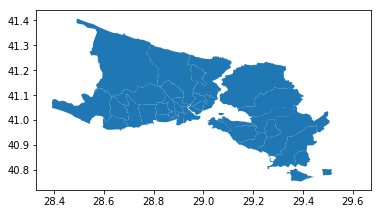

In [126]:
turkey_shp.plot()

In [159]:
minx, miny, maxx, maxy = turkey_shp.total_bounds

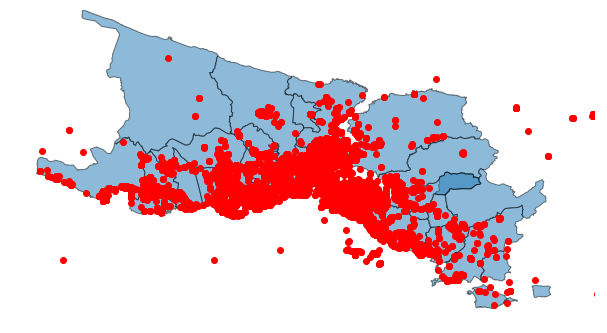

In [163]:
ax = turkey_shp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
geo_tagged_tweets_points.plot(ax=ax, color='red', alpha=1)
ax.set_axis_off()
plt.show()

In [166]:
turkey_shp

,id,osm_id,name,type,admin_leve,geometry
0,1,-1211204.0,ÃayÄ±rova,administrative,6.0,"POLYGON ((29.36230935432823 40.81645655992122,..."
1,2,-1765891.0,BahÃ§ekÃ¶y,administrative,6.0,"POLYGON ((28.94776959238925 41.20340569500294,..."
2,3,-1276035.0,PaÅakÃ¶y,administrative,8.0,"POLYGON ((29.26220084814665 41.00481996863542,..."
3,4,-1276010.0,Tuzla,administrative,6.0,"POLYGON ((29.25457909977195 40.81456166307078,..."
4,5,-1276012.0,Sultanbeyli,administrative,6.0,"POLYGON ((29.24469867994907 40.966230859891, 2..."
5,6,-1765896.0,ÅiÅli,administrative,6.0,"POLYGON ((28.96174968487333 41.05355143167688,..."
6,7,-1766095.0,BahÃ§elievler,administrative,6.0,"POLYGON ((28.80595709460593 41.01690147623165,..."
7,8,-1276013.0,Kartal,administrative,6.0,"POLYGON ((29.13871362145252 40.90621492442608,..."
8,9,-1766097.0,BayrampaÅa,administrative,6.0,"POLYGON ((28.8784443799837 41.07079795182767, ..."
9,10,-1765894.0,KaÄÄ±thane,administrative,6.0,"POLYGON ((28.9481769528835 41.06432117142646, ..."
